# K-NN(K-Nearest Neighbors) 알고리즘

유유상종 = 끼리끼리 = K-NN 알고리즘 = 서로 비슷한 속성끼리 모이는 경향

- 지도 학습
- 거리 기반 분류분석 모델(비지도 학습인 K-means와 다름)
- 거리 측정 시, 일반적으로 '유클라디안 거리' 계산법 사용
- 측정한 거리가 작은 순으로 k 개수의 데이터를 찾는다.
- 판별하고 싶은 데이터와 인접한 K 개수의 데이터를 찾아, 해당 데이터의 라벨이 다수인 범주로 데이터를 분류하는 방식


[K의 의미]
- 이웃의 개수 or 주변 데이터의 개수
- 홀수로 설정(2:2와 같은 동점 상황 피하기 위함)
- 주관적이므로 적당한 값을 정해야 함
- K값에 따라 분류결과, 정확도, 신뢰도 다름
- K값을 선택하면서 시행착오 필수

[장단점]
- 장점: 간단한 구조 / 이해 용이 / 구현 용이 / 강력한 결과 / 데이터가 적어도 모델 구현 가능
- 단점: 특징과 클래스 간 관계 이해 제한 / 적절한 K값 선택 필요 / 데이터가 많으면 분류 단계 느림 / 명목 특징 및 누락 데이터를 위한 추가 처리 필요(ex. 더미 코딩)

[주의점]
- 각 변수마다 범위 상이하여 재조정 필요(ex. 몸무게 단위 =/= 키 단위)
- '최소-최대 정규화' 또는 'z-점수 표준화'
- 실무에서는 'z-점수 표준화' 많이 사용

[모델 종류]
- KNeighborsClassifier() = 범주형 분류기로 사용  
- KNeighborsRegressor() = 연속형 값 예측

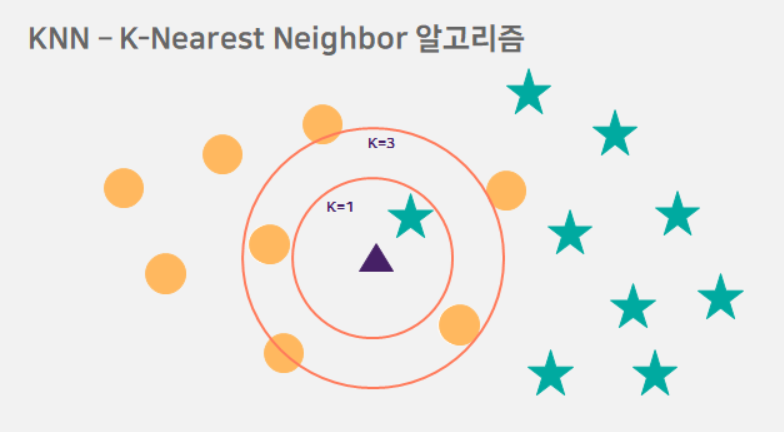

### 유방암 데이터 사용

In [47]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-white'])

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline
import multiprocessing

In [13]:
# 데이터 불러오기 및 데이터프레임 생성
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data,  columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=12)

In [18]:
# 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [25]:
# 모델 생성(scale 전)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('scale 전 학습 데이터 점수: {:.3f}'.format(model.score(X_train, y_train)))
print('scale 전 학습 데이터 점수: {:.3f}'.format(model.score(X_test, y_test)))

# 모델 생성(scale 후 )
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

print('scale 후 학습 데이터 점수: {:.3f}'.format(model.score(X_train_scale, y_train)))
print('scale 후 학습 데이터 점수: {:.3f}'.format(model.score(X_test_scale, y_test)))

scale 전 학습 데이터 점수: 0.962
scale 전 학습 데이터 점수: 0.889
scale 후 학습 데이터 점수: 0.972
scale 후 학습 데이터 점수: 0.959


In [36]:
# 교차 검증
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_val_score(estimator=estimator,
                        X = cancer.data, y = cancer.target,
                        cv = 5, 
                        n_jobs=multiprocessing.cpu_count())

print('교차 검증 점수: {}'.format(scores))
print('교차 검증 평균 점수: {}'.format(scores.mean()))

교차 검증 점수: [0.96491228 0.95614035 0.98245614 0.95614035 0.96460177]
교차 검증 평균 점수: 0.9648501785437045


In [41]:
# GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=5, 
                  n_jobs=multiprocessing.cpu_count())

gs.fit(cancer.data, cancer.target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=4,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}])

In [43]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [46]:
print('최적 파라미터: {}'.format(gs.best_params_))
print('최적 점수: {}'.format(gs.best_score_))
pd.DataFrame(gs.cv_results_)

최적 파라미터: {'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
최적 점수: 0.9701288619779538


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__n_neighbors,param_model__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009177,0.003302,0.015558,0.001354,ball_tree,3,uniform,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.973684,0.964912,0.982456,0.947368,0.929204,0.959525,0.019092,13
1,0.004788,0.000746,0.007179,0.001163,ball_tree,3,distance,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.973684,0.964912,0.982456,0.947368,0.929204,0.959525,0.019092,13
2,0.004787,0.000399,0.016755,0.004902,ball_tree,5,uniform,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.964912,0.956140,0.982456,0.956140,0.964602,0.964850,0.009610,7
3,0.004586,0.000488,0.007381,0.001850,ball_tree,5,distance,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.964912,0.956140,0.982456,0.956140,0.964602,0.964850,0.009610,7
4,0.004187,0.000398,0.020148,0.006805,ball_tree,7,uniform,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.973684,0.956140,0.982456,0.964912,0.973451,0.970129,0.008928,1
5,0.004587,0.000489,0.006383,0.000490,ball_tree,7,distance,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.973684,0.956140,0.982456,0.964912,0.973451,0.970129,0.008928,1
6,0.008975,0.004549,0.014560,0.001353,kd_tree,3,uniform,"{'model__algorithm': 'kd_tree', 'model__n_neig...",0.973684,0.964912,0.982456,0.947368,0.929204,0.959525,0.019092,13
7,0.007181,0.002394,0.008775,0.004108,kd_tree,3,distance,"{'model__algorithm': 'kd_tree', 'model__n_neig...",0.973684,0.964912,0.982456,0.947368,0.929204,0.959525,0.019092,13
8,0.007979,0.004505,0.016556,0.004704,kd_tree,5,uniform,"{'model__algorithm': 'kd_tree', 'model__n_neig...",0.964912,0.956140,0.982456,0.956140,0.964602,0.964850,0.009610,7
9,0.005188,0.000404,0.010769,0.003178,kd_tree,5,distance,"{'model__algorithm': 'kd_tree', 'model__n_neig...",0.964912,0.956140,0.982456,0.956140,0.964602,0.964850,0.009610,7


In [51]:
# 시각화(TSNE 사용)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

cancer_comp_df = pd.DataFrame(X_comp)
cancer_comp_df['target'] = cancer.target
cancer_comp_df.head()

,0,1,target
0,16.787905,35.218666,0
1,14.433888,33.873734,0
2,16.727108,29.297014,0
3,-19.388174,-16.463133,0
4,15.281240,27.316189,0


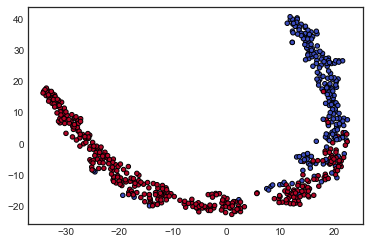

In [54]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### references

[데이터 마케팅 공부방](https://m.blog.naver.com/bestinall/221760380344)  
[K-NN 알고리즘](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-KNNK-Nearest-Neighbor-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)  
[2. 지도 학습 알고리즘 (1) k-Nearest Neighbors(k-NN)](https://jhryu1208.github.io/data/2020/10/25/SUPERVISED_LEARNING_1_k-NN.md/)